# Introduction to Data Visualization in Python
Link to : https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed

few popular plotting libs:
  - `matplotlib`: low level, much freedom
  - `pandas` objects: easy to use interface, based on matplotlib
  - `seaborn`: high-level interface
  - `ggplot`: based on R's ggplot2
  - `plotly`: interactive plots

In [6]:
import pandas as pd
import numpy as np

importing datasets

In [22]:
from sklearn.datasets import load_iris

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

iris_skd = load_iris()
iris_skd.feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris = sklearn_to_df(iris_skd)

iris

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [36]:
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


## matplotlib

In [24]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Scatterplot

Text(0, 0.5, 'sepal_width')

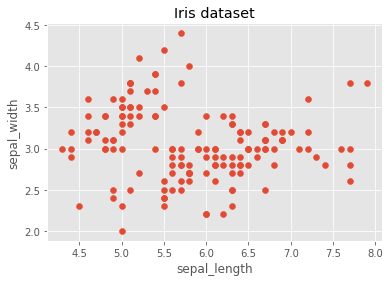

In [25]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(
    x=iris['sepal_length'],
    y=iris['sepal_width']
)
# set title and labels
ax.set_title('Iris dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

add coloring by class

Text(0, 0.5, 'sepal_width')

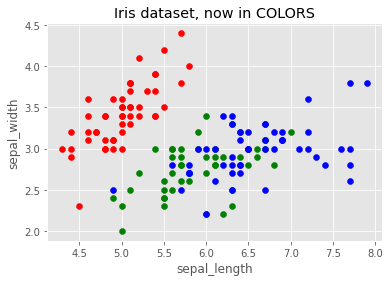

In [26]:
# create color dictionary
colors = {
    0: 'r',
    1: 'g',
    2: 'b'
}

# create fig + axis
fig, ax = plt.subplots()
for i in range( len(iris['sepal_length']) ):
    ax.scatter(
        x=iris['sepal_length'][i],
        y=iris['sepal_width'][i],
        color=colors[ iris['target'][i] ]
    )

# set title, labels
ax.set_title('Iris dataset, now in COLORS')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

### Line chart

using `plot()`

can plot multiple columns/graph, by looping columns and plot each column on same axis

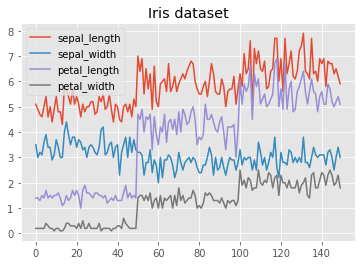

In [30]:
# get index and remove target col name
columns = iris.columns.drop(['target'])

# create x data
x_data = range(0, iris.shape[0])

# create fig axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)

# set title and legend
ax.set_title('Iris dataset')
ax.legend()

### Histogram

numeric attributes will be binned equi-width

Text(0, 0.5, 'freq')

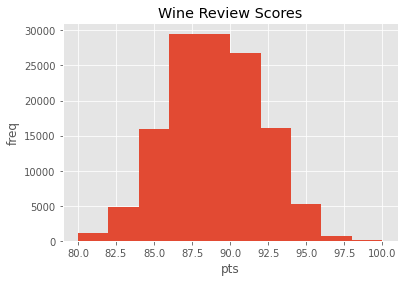

In [31]:
# fig and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(wine['points'])

# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('pts')
ax.set_ylabel('freq')

### Bar Chart

In [41]:
wine['points'].value_counts()

88     17207
87     16933
90     15410
86     12600
89     12226
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

Text(0, 0.5, 'Frequency')

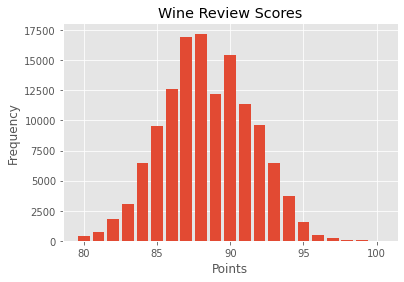

In [42]:
# create figure and axis
fig, ax = plt.subplots()

# count occurences of each class
data = wine['points'].value_counts()

# get x and y data
points = data.index
freq = data.values

# create bar char
ax.bar(points, freq)

# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')


### Heatmap

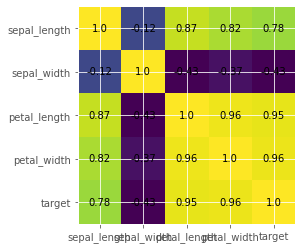

In [ ]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# rotate the tick labels and set their alignment
# plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# loop over data dimension and create text annotations
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2), ha='center', va='center', color='black')

## pandas Object

pandas Object have plotting functions based on matplotlib built-in

<AxesSubplot:title={'center':'Iris dataset'}, xlabel='sepal_length', ylabel='sepal_width'>

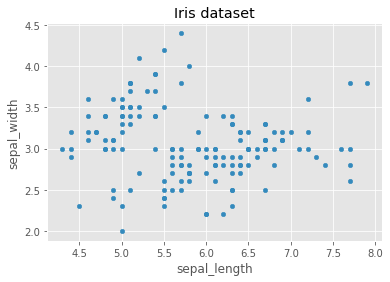

In [43]:
iris.plot.scatter(
    x='sepal_length',
    y='sepal_width',
    title='Iris dataset'
)

<AxesSubplot:title={'center':'Iris dataset'}>

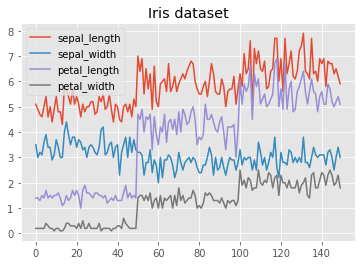

In [44]:
iris.drop(['target'], axis=1).plot.line(title='Iris dataset')

<AxesSubplot:ylabel='Frequency'>

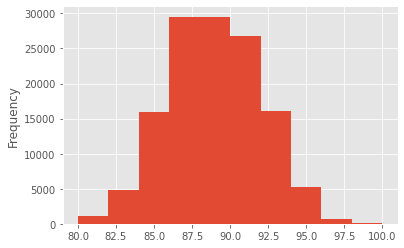

In [45]:
wine['points'].plot.hist()

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

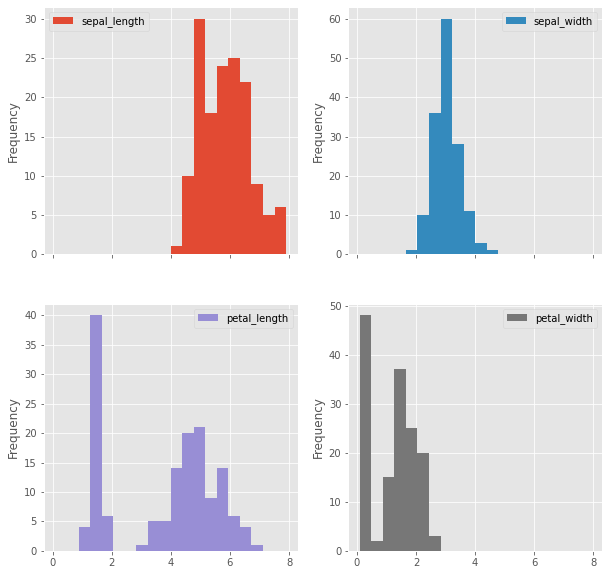

In [47]:
iris.drop(['target'], axis=1).plot.hist(subplots=True, layout=(2,2), figsize=(10,10), bins=20)

<AxesSubplot:>

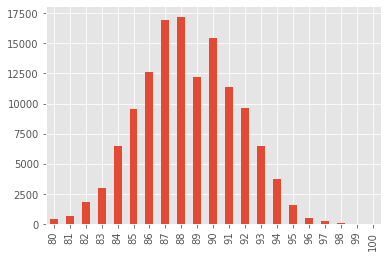

In [51]:
# removing sort_index() will revert to default: sort by value
wine['points'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

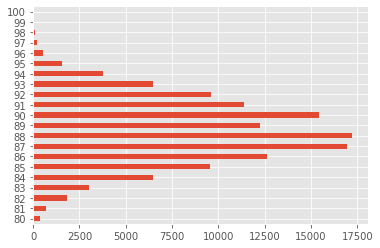

In [49]:
wine['points'].value_counts().sort_index().plot.barh()

<AxesSubplot:xlabel='country'>

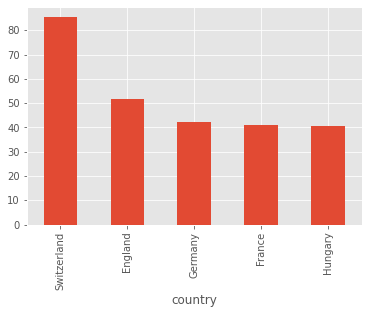

In [56]:
wine \
    .groupby('country')['price'].mean() \
    .sort_values(ascending=False)[:5] \
    .plot.bar()

# groupby country, get the price column (pd.Series) then extract its mean() into a new Series
# sort the new Series by values descending, then getting the top 5
# bar plot it

## seaborn

In [57]:
import seaborn as sns

### Scatterplot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

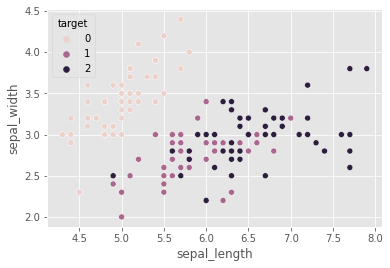

In [59]:
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    data=iris,
    hue='target'        # highlights points by class
)

# compared to matplotlib, seaborn simplify the steps
# matplotlib require for-loop through the dataset,
# rendering each point with color determined by dict

### Line chart

<AxesSubplot:>

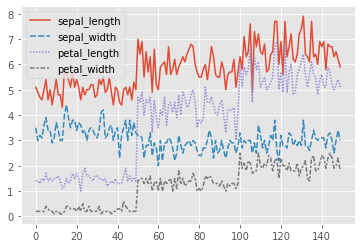

In [60]:
sns.lineplot(
    data=iris.drop(['target'], axis=1)
)

### Histogram

<AxesSubplot:xlabel='points'>

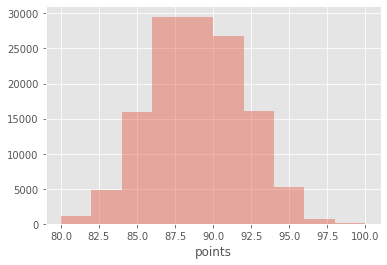

In [62]:
sns.distplot(
    wine['points'],
    bins=10,        # number of equi-width bins
    kde=False       # plot gaussian kde inside graph
)

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points', ylabel='Density'>

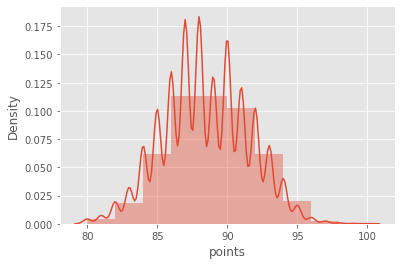

In [63]:
sns.distplot(
    wine['points'],
    bins=10,
    kde=True
)

### Bar chart

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points', ylabel='count'>

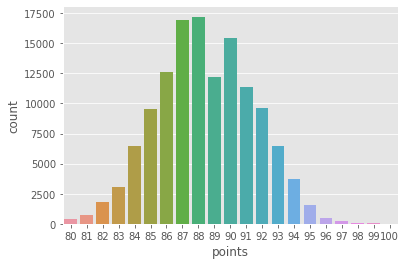

In [65]:
sns.countplot(wine['points'])

### Box plots

/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points', ylabel='price'>

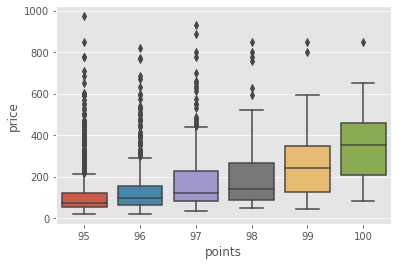

In [67]:
df = wine[
    (wine['points']>=95) & (wine['price']<1000)
    ]
sns.boxplot('points', 'price', data=df)

### Heatmap

<AxesSubplot:>

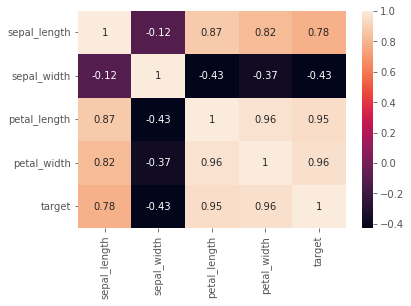

In [78]:
# get correlation matrix
corr = iris.corr()

sns.heatmap(iris.corr(), annot=True)

### Faceting

breaking data vars across multiple subplots and combining into a single figure

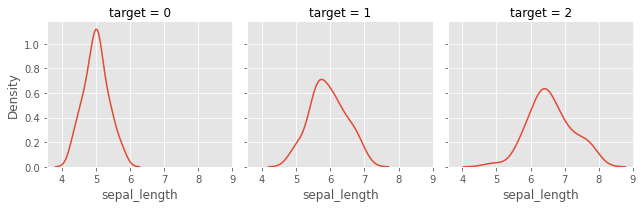

In [79]:
g = sns.FacetGrid(iris, col='target')
g = g.map(sns.kdeplot, 'sepal_length')

### Pairplot

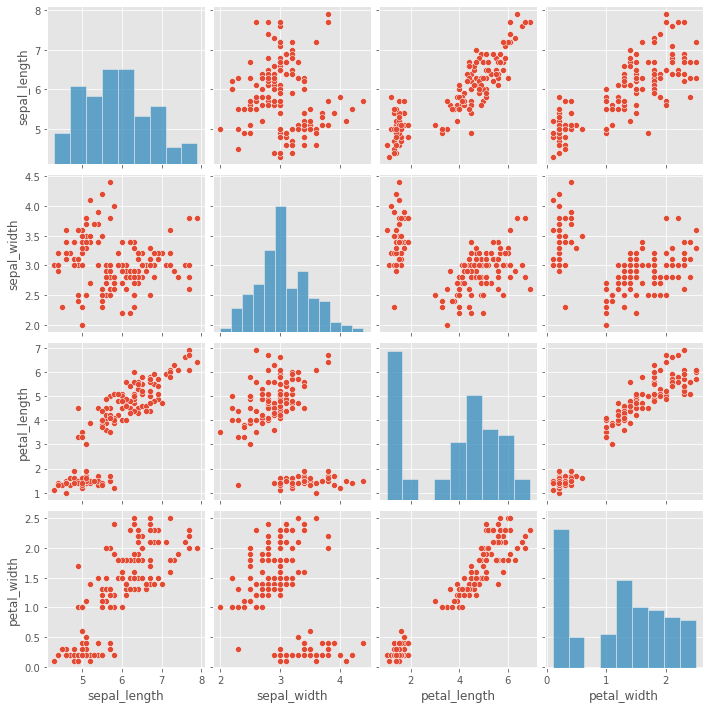

In [81]:
sns.pairplot(iris.drop(['target'], axis=1))